In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

TLC has a "dictionary" for FHV:

#### Hvfhs_license_num

The TLC license number of the HVFHS base or business. As of September 2019, the HVFHS licensees are the following:
* HV0002: Juno
* HV0003: Uber
* HV0004: Via
* HV0005: Lyft

#### Dispatching_base_num

The TLC Base License Number of the base that dispatched the trip

#### Pickup_datetime

The date and time of the trip pick-up

#### DropOff_datetime

The date and time of the trip dropoff

#### PULocationID

TLC Taxi Zone in which the trip began

#### DOLocationID

TLC Taxi Zone in which the trip ended

#### SR_Flag

Indicates if the trip was a part of a shared ride chain offered by a High Volume FHV company (e.g. Uber Pool, Lyft Line). For shared trips, the value is 1. For non-shared rides, this field is null.<br>
_Note: For most High Volume FHV companies, only shared rides that were requested AND matched to another shared-ride request over the course of the journey are flagged. However, Lyft (hvfhs_license_num=’HV0005’) also flags rides for which a shared ride was requested but another passenger was not successfully matched to share the trip—therefore, trips records with SR_Flag=1 from those two bases could indicate EITHER a trip in a shared trip chain OR a trip for which a shared ride was requested but never matched. Users should anticipate an overcount of successfully shared trips completed by Lyft._ <br>
_Note also that Juno does not offer shared trips at this time._

In [2]:
# Number of confirmed rides for 01/2015 through 01/2019 (yearly)
labels = ['Uber', 'Lyft', 'Via', 'Juno']
labels = ['Uber', 'Lyft', 'Other']

markers = ['^', 'o', 'x', 'v']
markers = ['^', 'o', 'x']

months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
years = ['15', '16', '17', '18', '19']
dates = [f'{month}/20{year}' for year in years for month in months]

rhps = np.loadtxt('monthly_number_rides.txt')
uber = rhps[2]
lyft = rhps[0]
via = rhps[1]
juno = rhps[3]
other = [v+j for v,j in zip(via, juno)]

# The total number of monthly rides per rhp
rhps = np.array([uber, lyft, via, juno])
rhps = np.array([uber, lyft, other])
# The accumulated number of rides per rhp
rhps_acc = np.array([[sum(rhps[i,:j+1]) for j in range(len(dates))] for i in range(len(labels))])

# The total number of monthly rides
total = np.array([sum(rhps[:, j]) for j in range(len(dates))])

# The monthly market share
marketshares = np.array([[rhps[i,j]/total[j] for j in range(len(dates))] for i in range(len(labels))])

# Print first non-zero values for each platform
def non_zero(array):
    is_zero = True
    for i,e in enumerate(array):
        is_zero = e == 0
        if not is_zero:
            return i
print(f'Uber started having rides at date index {non_zero(uber)}')
print(f'Lyft started having rides at date index {non_zero(lyft)}')
print(f'Juno started having rides at date index {non_zero(juno)}')
print(f'Via started having rides at date index {non_zero(via)}')

Uber started having rides at date index 0
Lyft started having rides at date index 3
Juno started having rides at date index 14
Via started having rides at date index 3


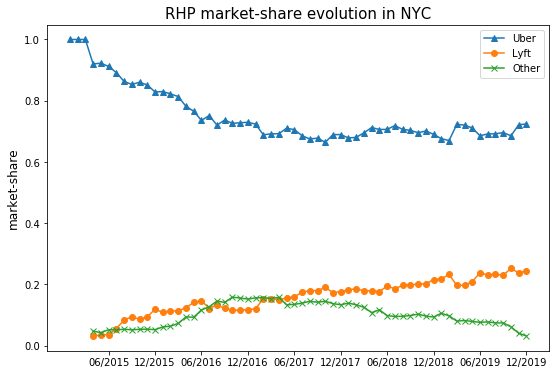

In [3]:
# Market share plot
plt.figure(figsize=(9, 6))
for i in range(len(labels)):
    j = 0 if i == 0 else 3
    plt.plot(dates[j:], marketshares[i,j:], label=labels[i], marker=markers[i])
plt.ylabel('market-share', size=12)
plt.title('RHP market-share evolution in NYC', size=15)
plt.xticks([date for date in dates if date[:2] in ['06', '12']])
plt.legend()
plt.savefig('rhp_marketshare_nyc.png', dpi=300)
# plt.show()

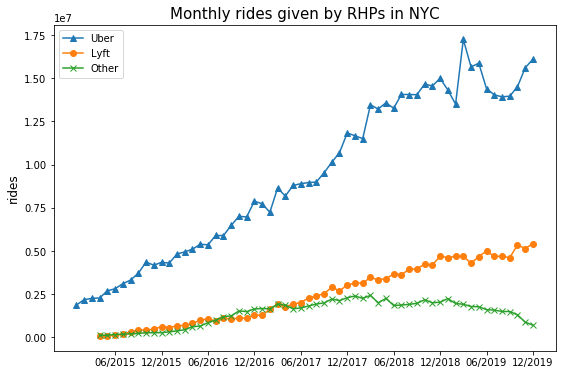

In [4]:
# Total number of rides plot
plt.figure(figsize=(9, 6))
for i in range(len(labels)):
    j = 0 if i == 0 else 3
    plt.plot(dates[j:], rhps[i,j:], label=labels[i], marker=markers[i])
plt.ylabel('rides', size=12)
plt.title('Monthly rides given by RHPs in NYC', size=15)
plt.xticks([date for date in dates if date[:2] in ['06', '12']])
plt.legend()
plt.savefig('rhp_rides_nyc.png', dpi=300)
# plt.show()

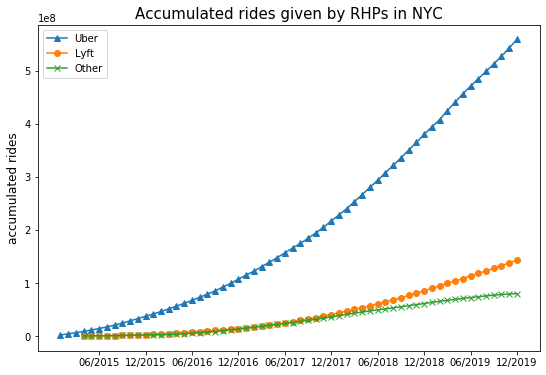

In [5]:
# Total number of rides plot
plt.figure(figsize=(9, 6))
for i in range(len(labels)):
    j = 0 if i == 0 else 3
    plt.plot(dates[j:], rhps_acc[i,j:], label=labels[i], marker=markers[i])
plt.ylabel('accumulated rides', size=12)
plt.title('Accumulated rides given by RHPs in NYC', size=15)
plt.xticks([date for date in dates if date[:2] in ['06', '12']])
plt.legend()
plt.savefig('rhp_acc_rides_nyc.png', dpi=300)
# plt.show()

In [5]:
# # COUNTING WHICH RHP HAS HOW MANY RIDES PER MONTH

# rhps = {
#     'Lyft': [],
#     'Via': [],
#     'Uber': [],
#     'Juno': []
# }
# for year in ['15', '16', '17', '18', '19']:
#     for month in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']:
#         # Read the file
#         filename = f'records/clean/fhv_tripdata_20{year}-{month}.csv'
#         data = pd.read_csv(filename).drop(columns=['Unnamed: 0'])
        
#         # Count the number of rides for each rhp correctly
#         key = 'Dispatching_base_num'
#         if year == '19':
#             key = 'dispatching_base_num'
#         if year == '18':
#             key = 'Dispatching_base_number'
#         data = data.groupby([key]).size().reset_index(name='counts')
        
#         # Aggregate the info
#         seen = []
#         for index, row in data.iterrows():
#             rhps[row[key]].append(row['counts'])
#             seen.append(row[key])
#         # If a rhp had no rides that month, append 0
#         for rhp in rhps.keys():
#             if rhp not in seen:
#                 rhps[rhp].append(0)
#         print(f'{filename}...')
# np.savetxt('monthly_number_rides.txt', list(rhps.values()))

records/clean/fhv_tripdata_2015-01.csv...
records/clean/fhv_tripdata_2015-02.csv...
records/clean/fhv_tripdata_2015-03.csv...
records/clean/fhv_tripdata_2015-04.csv...
records/clean/fhv_tripdata_2015-05.csv...
records/clean/fhv_tripdata_2015-06.csv...
records/clean/fhv_tripdata_2015-07.csv...
records/clean/fhv_tripdata_2015-08.csv...
records/clean/fhv_tripdata_2015-09.csv...
records/clean/fhv_tripdata_2015-10.csv...
records/clean/fhv_tripdata_2015-11.csv...
records/clean/fhv_tripdata_2015-12.csv...
records/clean/fhv_tripdata_2016-01.csv...
records/clean/fhv_tripdata_2016-02.csv...
records/clean/fhv_tripdata_2016-03.csv...
records/clean/fhv_tripdata_2016-04.csv...
records/clean/fhv_tripdata_2016-05.csv...
records/clean/fhv_tripdata_2016-06.csv...
records/clean/fhv_tripdata_2016-07.csv...
records/clean/fhv_tripdata_2016-08.csv...
records/clean/fhv_tripdata_2016-09.csv...
records/clean/fhv_tripdata_2016-10.csv...
records/clean/fhv_tripdata_2016-11.csv...
records/clean/fhv_tripdata_2016-12

In [3]:
# # CLEANING THE ORIGINAL DATA TO GET THE RHP NAMES IN COLUMNS

# # Store the translation between license number and RHP
# rhp = {
#     'HV0002': 'Juno',
#     'B02914': 'Juno',
#     'B02907': 'Juno',
#     'B02908': 'Juno',
#     'B03035': 'Juno',
    
#     'HV0005': 'Lyft',
#     'B02510': 'Lyft',
#     'B02844': 'Lyft',
    
#     'HV0003': 'Uber',
#     'B02877': 'Uber',
#     'B02866': 'Uber',
#     'B02882': 'Uber',
#     'B02869': 'Uber',
#     'B02617': 'Uber',
#     'B02876': 'Uber',
#     'B02865': 'Uber',
#     'B02512': 'Uber',
#     'B02888': 'Uber',
#     'B02864': 'Uber',
#     'B02883': 'Uber',
#     'B02875': 'Uber',
#     'B02682': 'Uber',
#     'B02880': 'Uber',
#     'B02870': 'Uber',
#     'B02404': 'Uber',
#     'B02598': 'Uber',
#     'B02765': 'Uber',
#     'B02879': 'Uber',
#     'B02867': 'Uber',
#     'B02878': 'Uber',
#     'B02887': 'Uber',
#     'B02872': 'Uber',
#     'B02836': 'Uber',
#     'B02884': 'Uber',
#     'B02835': 'Uber',
#     'B02764': 'Uber',
#     'B02889': 'Uber',
#     'B02871': 'Uber',
#     'B02395': 'Uber',
    
#     'HV0004': 'Via',
#     'B03136': 'Via',
#     'B02800': 'Via'
# }

# rhps = ['Uber', 'Lyft', 'Juno', 'Via']
# for year in ['15', '16', '17', '18', '19']:
#     for month in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']:
#         filename = f'fhv_tripdata_20{year}-{month}.csv'
#         if year != '19':
#             continue
#         data = pd.read_csv('records/' + filename)
#         # Replace all dispatch codes with rhp names
#         try:
#             data.Dispatching_base_num.replace(rhp, inplace=True)
#             data = data[data.Dispatching_base_num.isin(rhps)]
#         except: 
#             try:
#                 data.dispatching_base_num.replace(rhp, inplace=True)
#                 data = data[data.dispatching_base_num.isin(rhps)]
#             except: 
#                 data.Dispatching_base_number.replace(rhp, inplace=True)
#                 data = data[data.Dispatching_base_number.isin(rhps)]
#         data.to_csv('records/clean/' + filename)
#         print(f'{filename} done...')

fhv_tripdata_2015-01.csv done...
fhv_tripdata_2015-02.csv done...
fhv_tripdata_2015-03.csv done...
fhv_tripdata_2015-04.csv done...
fhv_tripdata_2015-05.csv done...
fhv_tripdata_2015-06.csv done...
fhv_tripdata_2015-07.csv done...
fhv_tripdata_2015-08.csv done...
fhv_tripdata_2015-09.csv done...
fhv_tripdata_2015-10.csv done...
fhv_tripdata_2015-11.csv done...
fhv_tripdata_2015-12.csv done...
fhv_tripdata_2016-01.csv done...
fhv_tripdata_2016-02.csv done...
fhv_tripdata_2016-03.csv done...
fhv_tripdata_2016-04.csv done...
fhv_tripdata_2016-05.csv done...
fhv_tripdata_2016-06.csv done...
fhv_tripdata_2016-07.csv done...
fhv_tripdata_2016-08.csv done...
fhv_tripdata_2016-09.csv done...
fhv_tripdata_2016-10.csv done...
fhv_tripdata_2016-11.csv done...
fhv_tripdata_2016-12.csv done...


/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


fhv_tripdata_2017-01.csv done...
fhv_tripdata_2017-02.csv done...
fhv_tripdata_2017-03.csv done...
fhv_tripdata_2017-04.csv done...
fhv_tripdata_2017-05.csv done...
fhv_tripdata_2017-06.csv done...
fhv_tripdata_2017-07.csv done...
fhv_tripdata_2017-08.csv done...
fhv_tripdata_2017-09.csv done...
fhv_tripdata_2017-10.csv done...
fhv_tripdata_2017-11.csv done...
fhv_tripdata_2017-12.csv done...
fhv_tripdata_2018-01.csv done...
fhv_tripdata_2018-02.csv done...
fhv_tripdata_2018-03.csv done...
fhv_tripdata_2018-04.csv done...
fhv_tripdata_2018-05.csv done...
fhv_tripdata_2018-06.csv done...
fhv_tripdata_2018-07.csv done...
fhv_tripdata_2018-08.csv done...
fhv_tripdata_2018-09.csv done...
fhv_tripdata_2018-10.csv done...
fhv_tripdata_2018-11.csv done...
fhv_tripdata_2018-12.csv done...
fhv_tripdata_2019-01.csv done...
fhv_tripdata_2019-02.csv done...
fhv_tripdata_2019-03.csv done...
fhv_tripdata_2019-04.csv done...
fhv_tripdata_2019-05.csv done...
fhv_tripdata_2019-06.csv done...
fhv_tripda